## Depth of upwelling in two-canyon runs

* All experiments have 3 runs to get a mean curve (except aug01, I eliminated run that does weird things).
* Parameters can be found on google drive sheet lab_speadsheets/exp_list

Using calibration 9th Aug (closest to exeriments) to check how it affects density change in the canyon heads.


In [30]:
import cmocean as cmo
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np
from numpy.polynomial import polynomial as P
import os
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import profiler_tools as ptools
import conduino_tools as ctools


In [7]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [8]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [9]:
def plot_uprofile(ax, col='0.8'):
    ax.axvline(15, color=col, linestyle=':')
    ax.axvline(21.0+15, color=col, linestyle=':')
    ax.axvline(71.0+15, color=col, linestyle=':')
        
def plot_forcing(ax, file, f0, f1, f2, t0, t1):
    '''ax: axes to plot figure on
       file: experiment file to extract time
       f0: Angular velocity of the table during spin up
       f1: f at max forcing
       f2: f to avoid spin down
       t0: time to get to f1
       t1: time to get to f2'''
    mat = sio.loadmat(file, squeeze_me=True)
    time = mat['time']
    t2 = np.round(np.max(time),2) # s

    ax0.text(0.3,0.3,r'$\Delta f_1=$%1.2f rad/s, $\Delta t_1=$%1.1f s' %((f1-f0),t0), transform=ax0.transAxes)
    ax0.text(0.5,0.7,r'$\Delta f_2=$%1.2f rad/s, $\Delta t_2=$%1.1f s' %((f2-f1),(t1-t0)), transform=ax0.transAxes)

    ax0.plot([0,t0,t1,t2],[f0,f1,f2,f2], 'g-')
    ax0.set_ylabel('f table / rad s$^{-1}$')
    ax0.set_xlabel('time / s')

In [10]:
# Information for all runs is stored in experiment_dictionaries.py
lib_path = os.path.abspath('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts') # Add absolute path to my python scripts
sys.path.append(lib_path)

import experiment_dictionaries as exdic

In [11]:
exp_dicts = [exdic.T01,exdic.T02,exdic.T03,exdic.T04,exdic.T05,
             exdic.T06,exdic.T07,exdic.T08,exdic.T09,exdic.T10,
             exdic.T11,exdic.T12, exdic.DYE02]
exp_num = len(exp_dicts) # number of experiment dictionaries

colors = ['teal','darkorange','yellowgreen', 'tan']
exp_Norder = [exdic.T01,exdic.T02,exdic.T03,exdic.T04,exdic.T05,
             exdic.T06,exdic.T07,exdic.T08,exdic.T09,exdic.T10,
             exdic.T11,exdic.T12, exdic.DYE02]

### Plots arranged by $N_{shelf}$ and $f$

Plotting mean upstream, mean downstream and mean difference filtered using salish sea filter_timeseries with window win = int(T/dt) where T is the inertial period and dt the time between conduino samples.  

12.566370614359172
12.566370614359172
12.566370614359172
12.566370614359172
12.566370614359172
7.853981633974483
7.853981633974483
7.853981633974483
12.566370614359172
8.975979010256552
8.975979010256552
8.975979010256552


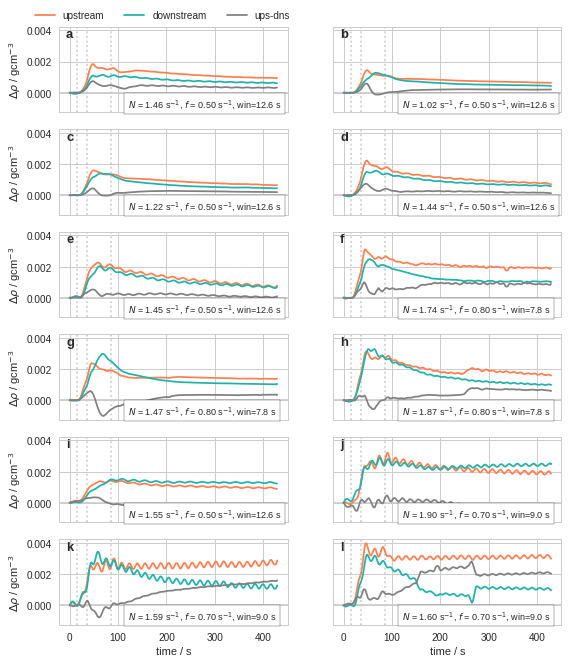

In [22]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5),(ax6,ax7),(ax8,ax9),(ax10,ax11)) = plt.subplots(6, 2, figsize=(9,11), 
                                                                                    sharey=True, sharex=True)

axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]
filepath = exdic.T01['dir']+exdic.T01['run_files'][0]
mat = sio.loadmat(filepath, squeeze_me=True)
time = mat['time']
panel_labels = ['a','b','c','d','e','f','g','h','i','j','k','l']
rho0=998.5
g = 9.81

for exp, kk, ax,pan_lab in zip(exp_Norder, range(exp_num), axs, panel_labels):
    avg1 = np.zeros_like(time)
    avg2 = np.zeros_like(time)
    avg3 = np.zeros_like(time)
    Navg = np.ones((4))*np.nan
    for ii,col in zip(range(len(exp['run_files'])),colors):
         
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        avg1 = avg1+(dens1-dens1[0])
        avg2 = avg2+(dens2-dens2[0])
        avg3 = avg3+((dens1-dens1[0])-(dens2-dens2[0]))
        Navg[ii] = ((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5 
    
    N = np.nanmean(Navg)
    inertial_period = 1/((exp["fo"])/(2*np.pi))
    win = int(inertial_period/dt)
    print(inertial_period)
    ax.axhline(0, color='0.8')
    plot_uprofile(ax)
    ax.text(0.3,0.07,'$N$ = %1.2f s$^{-1}$, $f$ = %1.2f s$^{-1}$, win=%1.1f s' \
            %(N,exp["fo"],win*dt), transform=ax.transAxes,fontsize=9,
            bbox=dict(facecolor='white', alpha=1) )
    
    ax.plot(time, ctools.filter_timeseries(avg1/(len(exp['run_files'])),winlen=win),'-',
            color='coral', label='upstream')
    ax.plot(time, ctools.filter_timeseries(avg2/(len(exp['run_files'])),winlen=win),'-',
            color='lightseagreen', label='downstream')
    ax.plot(time, ctools.filter_timeseries(avg3/(len(exp['run_files'])),winlen=win),
            '-',color='0.5', label='ups-dns')    
    ax.text(0.03,0.88, pan_lab, fontweight='bold', fontsize=13, transform=ax.transAxes)

for ax in [ax0,ax2,ax4,ax6,ax8, ax10]:
    ax.set_ylabel(r'$\Delta \rho$ / gcm$^{-3}$')
ax10.set_xlabel('time / s')
ax11.set_xlabel('time / s')
ax1.legend(ncol=3,bbox_to_anchor=(-0.15,1.3))
plt.savefig('figures/twocanyon_timeseries.eps', format='eps', transparent=False, bbox_inches='tight')

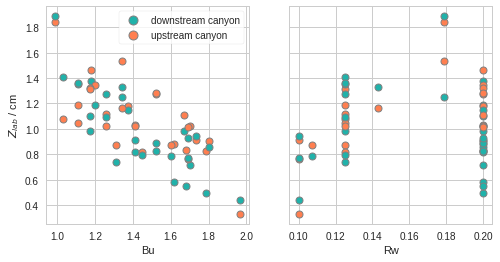

In [37]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(8,4), sharey=True)

rho0=998.5
g = 9.81

for exp, kk in zip(exp_dicts, range(exp_num)):
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        
        W = 5 # cm
        if np.isnan(exp["rho_sb"][ii])==True:
            N =((g/rho0)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N =((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
        
        Bu = N*exp["hsb"]/(exp["fo"]*W)
        Rw = exp["U"]/(exp["fo"]*W)
        
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        delta_rho2 = 1000*(np.max(ctools.filter_timeseries(dens2[0:2400]-dens2[0],winlen=win))) # kg/m^3
        delta_rho1 = 1000*(np.max(ctools.filter_timeseries(dens1[0:2400]-dens1[0],winlen=win))) # kg/m^3
        
        Z1 = 100*(g/rho0)*(delta_rho1/N**2) #cm
        Z2 = 100*(g/rho0)*(delta_rho2/N**2) #cm
        
        sca = ax1.plot(Bu,Z1,
                       'o',color='coral', markeredgecolor='0.5', markeredgewidth=1) 
        
        sca = ax1.plot(Bu,Z2,
                       'o',color='lightseagreen', markeredgecolor='0.5', markeredgewidth=1) 
        
        sca2 = ax2.plot(Rw,Z1,
                        'o',color='coral', markeredgecolor='0.5', markeredgewidth=1) 
        sca2 = ax2.plot(Rw,Z2,
                        'o',color='lightseagreen', markeredgecolor='0.5', markeredgewidth=1) 

        
legend_elements = [Line2D([0], [0], marker='o', color='w', label='downstream canyon',
                          markerfacecolor='lightseagreen',markeredgecolor='0.5',markeredgewidth=1,
                          markersize=9),
                   Line2D([0], [0], marker='o', color='w', label='upstream canyon',
                          markerfacecolor='coral',markeredgecolor='0.5',markeredgewidth=1,
                          markersize=9),
                   ]
ax1.legend(handles=legend_elements, loc=0,frameon=True )
ax1.set_xlabel('Bu')
ax2.set_xlabel('Rw')
ax1.set_ylabel(r'$Z_{lab}$ / cm')
plt.savefig('figures/Z_Ro_Rw_twocan.eps', format='eps', transparent=False, bbox_inches='tight')

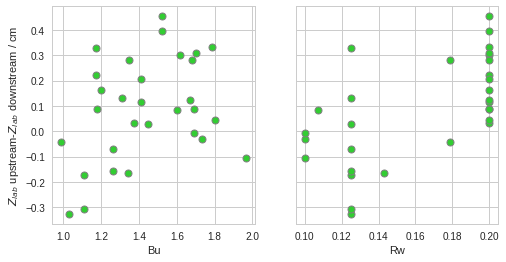

In [54]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(8,4), sharey=True)

rho0=998.5
g = 9.81

for exp, kk in zip(exp_dicts, range(exp_num)):
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        
        W = 5 # cm
        if np.isnan(exp["rho_sb"][ii])==True:
            N =((g/rho0)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N =((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
        
        Bu = N*exp["hsb"]/(exp["fo"]*W)
        Rw = exp["U"]/(exp["fo"]*W)
        
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        delta_rho2 = 1000*(np.max(ctools.filter_timeseries(dens2[0:2400]-dens2[0],winlen=win))) # kg/m^3
        delta_rho1 = 1000*(np.max(ctools.filter_timeseries(dens1[0:2400]-dens1[0],winlen=win))) # kg/m^3
        
        Z1 = 100*(g/rho0)*(delta_rho1/N**2) #cm
        Z2 = 100*(g/rho0)*(delta_rho2/N**2) #cm
        
        sca = ax1.plot(Bu,Z1-Z2,
                       'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
          
        sca2 = ax2.plot(Rw,Z1-Z2,
                        'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        
ax1.set_xlabel('Bu')
ax2.set_xlabel('Rw')
ax1.set_ylabel(r'$Z_{lab}$ upstream-$Z_{lab}$ downstream / cm')
plt.savefig('figures/difference_Z_Ro_Rw_twocan.eps', format='eps', transparent=False, bbox_inches='tight')

the rmse1 is 0.154193
the rmse2 is 0.264457


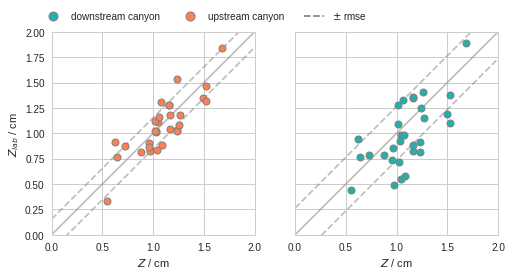

In [62]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(8,4), sharey=True)

rho0 = 998.5
g = 9.81
W = 0.05 # m
L = 0.12 # m

Z_list1 = []
Z_list2 = []
Z_HA2013_list = []


for exp, kk in zip(exp_dicts, range(exp_num)):
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        
        
        if np.isnan(exp["rho_sb"][ii])==True:
            N =((g/rho0)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N =((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
        
        f = exp["fo"] # rad/s
        U = exp["U"]/100 # m/s
        Hs = exp["hsb"]/100 # m
        s = (0.029-0.005)/(0.215) # (Hsb-Hcoast)/(dist coast to sb) = 0.112
        Dh = (f*L)/N
        Rw = U/(f*W)
        Rl = U/(f*L)
        Fw = Rw/(0.9+Rw)
        Se = (s*N)/(f*((Fw/Rl)**0.5))
        Z_HA2013 = Dh*((1.8*((Fw*Rl)**0.5)*(1-0.42*Se))+0.05)
        
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        delta_rho2 = 1000*(np.max(ctools.filter_timeseries(dens2[0:2400]-dens2[0],winlen=win))) # kg/m^3
        delta_rho1 = 1000*(np.max(ctools.filter_timeseries(dens1[0:2400]-dens1[0],winlen=win))) # kg/m^3
        
        Z1 = (g/rho0)*(delta_rho1/N**2) #cm
        Z2 = (g/rho0)*(delta_rho2/N**2) #cm
        
        Z_list1.append(Z1*100)
        Z_list2.append(Z2*100)
        Z_HA2013_list.append(Z_HA2013*100)
        
        sca = ax1.plot(Z_HA2013*100,Z1*100,
                       'o',color='coral', markeredgecolor='0.5', markeredgewidth=1) 
        
        sca = ax2.plot(Z_HA2013*100,Z2*100,
                       'o',color='lightseagreen', markeredgecolor='0.5', markeredgewidth=1) 
        
rmse1 = (mean_squared_error(Z_HA2013_list, Z_list1))**0.5
rmse2 = (mean_squared_error(Z_HA2013_list, Z_list2))**0.5
print('the rmse1 is %f' %rmse1)        
print('the rmse2 is %f' %rmse2)        

ax1.set_xlabel('$Z$ / cm')
ax2.set_xlabel('$Z$ / cm')
ax1.set_ylabel(r'$Z_{lab}$ / cm')
ax1.set_xlim(0,2)
ax1.set_ylim(0,2)
ax1.set_aspect(1)
ax2.set_xlim(0,2)
ax2.set_ylim(0,2)
ax2.set_aspect(1)
ax1.plot(np.linspace(0,2,20),np.linspace(0,2,20), '-', color='0.5', alpha = 0.5,zorder=1)
ax1.plot(np.linspace(0,2,20),np.linspace(0,2,20)+rmse1, '--', color='0.5', alpha = 0.5,zorder=1)
ax1.plot(np.linspace(0,2,20),np.linspace(0,2,20)-rmse1, '--', color='0.5', alpha = 0.5,zorder=1)
ax2.plot(np.linspace(0,2,20),np.linspace(0,2,20), '-', color='0.5', alpha = 0.5,zorder=1)
ax2.plot(np.linspace(0,2,20),np.linspace(0,2,20)+rmse2, '--', color='0.5', alpha = 0.5,zorder=1)
ax2.plot(np.linspace(0,2,20),np.linspace(0,2,20)-rmse2, '--', color='0.5', alpha = 0.5,zorder=1)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='downstream canyon',
                          markerfacecolor='lightseagreen',markeredgecolor='0.5',markeredgewidth=1,
                          markersize=9),
                   Line2D([0], [0], marker='o', color='w', label='upstream canyon',
                          markerfacecolor='coral',markeredgecolor='0.5',markeredgewidth=1,
                          markersize=9),
                   Line2D([0], [0], linestyle='--',color='0.5', label='$\pm$ rmse'),
                   ]
ax2.legend(handles=legend_elements,ncol=3, bbox_to_anchor=(0.4,1.15))
plt.savefig('figures/Zlab_vs_Z_HA2013_twocan.eps', format='eps', transparent=False, bbox_inches='tight')